<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto** | Sinasc
<br>

Notebook [Diego Furukawa](#eu)

---

# 0. Índice <a name="Contents"></a>
1. [Etapa 1 CRISP - DM: Entendimento do negócio](#exerc_01)
2. [Etapa 2 Crisp-DM: Entendimento dos dados](#exerc_02)
3. [Etapa 3 Crisp-DM: Preparação dos dados](#exerc_03)
4. [Etapa 4 Crisp-DM: Modelagem](#exerc_04)
5. [Etapa 5 Crisp-DM: Avaliação dos resultados](#exerc_05)
    1. [Quantidade de bebês ao longo do ano](#exemplo_5_1)
    2. [Quantidade de bebês fem e masc ao longo do ano](#exemplo_5_2)
    3. [Quantidade de bebês por dia da semana](#exemplo_5_3)
    4. [Quantidade de bebês fem e masc por mês](#exemplo_5_4)
    5. [Escolaridade mãe (ESCMAE) ](#exemplo_5_5)
7. [Etapa 6 Crisp-DM: Implantação](#exerc_06)


## 1. Etapa 1 CRISP - DM: Entendimento do negócio <a name="exerc_01"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

## 2. Etapa 2 Crisp-DM: Entendimento dos dados <a name="exerc_02"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo `estrutura_sinasc_para_CD.pdf` (o nome do arquivo tal qual no portal do DataSUS).

#### Dicionário de dados

Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
|NUMERODN|Número da DN,  seqüencial por UF informante e por ano.||
|LOCNASC|Local de ocorrência do nascimento, conforme a tabela: <br> 9:   Ignorado <br> 1:   Hospital <br> 2:   Outro Estab Saúde <br> 3:   Domicílio <br> 4:   Outros|int64|
|CODESTAB|Código de estabelecimento de saúde.|float64|
|CODBAINASC|Código Bairro nascimento.||
|CODMUNNASC|Código do município de ocorrência.|int64|
|IDADEMAE|Idade da mãe em anos.|int64|
|ESTCIVMAE|Estado civil, conforme a tabela: <br> 1:   Solteira <br> 2:   Casada <br> 3:   Viúva <br> 4:   Separado judicialmente/Divorciado <br> 9:   Ignorado|float64|
|ESCMAE|Escolaridade, anos de estudo concluídos: 1:   Nenhuma <br> 2:   1 a 3 anos <br> 3:   4 a 7 anos <br> 4:   8 a 11 anos <br> 5: 12 e mais <br> 9:  Ignorado|object|
|CODOCUPMAE|Ocupação, conforme a Classificação Brasileira de Ocupações (CBO-2002).|float64|
|QTDFILVIVO|Número de filhos vivos.|float64|
|QTDFILMORT|Número de filhos mortos.|float64|
|CODBAIRES|Código bairro residência.||
|CODMUNRES|Município de residência da mãe.|int64|
|GESTACAO|Semanas de gestação, conforme a tabela: <br> 9:   Ignorado <br> 1:   Menos de 22 semanas <br> 2:   22 a 27 semanas <br> 3:   28 a 31 semanas <br> 4:   32 a 36 semanas <br> 5:   37 a 41 semanas <br> 6:   42 semanas e mais|object|
|GRAVIDEZ|Tipo de gravidez, conforme a tabela: <br> 9:   Ignorado <br> 1:   Única <br> 2:   Dupla <br> 3:   Tripla e mais|object|
|PARTO|Tipo de parto, conforme a tabela: <br> 9:   Ignorado <br> 1:   Vaginal <br> 2:   Cesáreo|object|
|CONSULTAS|Número de consultas de pré-natal: <br> 1: Nenhuma <br> 2: de 1 a 3  <br> 3: de 4 a 6 <br> 4: 7 e mais <br> 9: Ignorado|int64|
|DTNASC|Data do nascimento, no formato ddmmaaaa|object|
|HORANASC|Hora do nascimento|float64|
|SEXO|Sexo, conforme a tabela: <br> 0: Ignorado; <br> 1: Masculino; <br> 2: Feminino|object|
|APGAR1|Apgar no primeiro minuto; 00 a 10|float64|
|APGAR5|Apgar no quinto minuto; 00 a 10|float64|
|RACACOR|Raça/Cor: <br> 1:Branca <br> 2:Preta <br> 3:Amarela <br> 4: Parda <br> 5: Indígena|object|
|PESO|Peso ao nascer, em gramas.|int64|
|IDANOMAL|Anomalia congênita: <br> 9-Ignorado <br> 1=Sim <br> 2=Não|float64|
|CODANOMAL|Código de malformação congênita ou anomalia cromossômica, de acordo com a CID-10.|object|
|DTCADASTRO|Data de cadastramento no sistema.|object|
|DTRECEBIM|Data de recebimento no nível central, data da última atualização do registro.|object|
|CODESTAB|Código da Instalação da geração dos Registros.|float64|
|CODUFNATU|Código da UF que informou o registro.|float64|


## 3. Etapa 3 Crisp-DM: Preparação dos dados <a name="exerc_03"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base.   

2. Contagem do número de valores *missing* por variável.

3. Refazendo a contagem de valores missings de colunas que realmente interessam. <br>
São elas:
` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
`

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento.<br> Como Apgar5 será a nossa variável de interesse principal. Removemos todos os registros com Apgar5 não preenchido. <br> Contamos novamente o número de linhas e o número de *missings*.<br>
5. observe que as variáveis `['ESTCIVMAE', 'CONSULTAS']` possuem o código `9`, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código `9`.<br>
6. Substitua os valores faltantes da quantitativa (`QTDFILVIVO`) por zero.<br>
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.<br>
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`.

In [304]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()  
%matplotlib inline

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape

(27028, 69)


(27028, 69)

In [306]:
# 02. Conte o número de valores missing por variável.

sinasc.isna().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

In [308]:
# 03 Refazendo a contagem de valores missings de colunas que realmente interessam

sinasc_new = sinasc[['PESO', 'LOCNASC','IDADEMAE','ESTCIVMAE','ESCMAE','QTDFILVIVO','GESTACAO','GRAVIDEZ','CONSULTAS','APGAR5', 'SEXO', 'APGAR1', 'DTNASC']]
display(sinasc_new)
sinasc_new.isna().sum()

,PESO,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,SEXO,APGAR1,DTNASC
0,3685,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,9.0,2019-02-19
1,3055,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Feminino,8.0,2019-02-21
2,3460,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Feminino,8.0,2019-02-25
3,2982,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Feminino,9.0,2019-03-20
4,3310,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Feminino,8.0,2019-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,2110,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0,Masculino,8.0,2019-12-13
27024,3310,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0,Masculino,8.0,2019-10-04
27025,3065,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,9.0,2019-08-02
27026,2352,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0,Masculino,8.0,2019-12-23


PESO             0
LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
SEXO             4
APGAR1          96
DTNASC           0
dtype: int64

In [310]:
# Como Apgar5 será a nossa variável de interesse principal. Removemos todos os registros com Apgar5 não preenchido
# Contamos novamente

sinasc_new = sinasc_new[~sinasc_new.APGAR5.isna()]
sinasc_new = sinasc_new[~sinasc_new.APGAR1.isna()]
display(sinasc_new)

,PESO,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,SEXO,APGAR1,DTNASC
0,3685,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,9.0,2019-02-19
1,3055,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Feminino,8.0,2019-02-21
2,3460,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Feminino,8.0,2019-02-25
3,2982,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Feminino,9.0,2019-03-20
4,3310,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Feminino,8.0,2019-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,2110,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0,Masculino,8.0,2019-12-13
27024,3310,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0,Masculino,8.0,2019-10-04
27025,3065,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,9.0,2019-08-02
27026,2352,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0,Masculino,8.0,2019-12-23


In [312]:
sinasc_new.isna().sum()

PESO             0
LOCNASC          0
IDADEMAE         0
ESTCIVMAE      315
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
SEXO             4
APGAR1           0
DTNASC           0
dtype: int64

In [314]:
# ['ESTCIVMAE', 'CONSULTAS']
# 5) seu código aqui

sinasc_new['ESTCIVMAE'].fillna(9, inplace=True)
sinasc_new['CONSULTAS'].fillna(9, inplace=True)
sinasc_new.isna().sum()

/tmp/ipykernel_8941/2160707932.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sinasc_new['ESTCIVMAE'].fillna(9, inplace=True)
/tmp/ipykernel_8941/2160707932.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

PESO             0
LOCNASC          0
IDADEMAE         0
ESTCIVMAE        0
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
SEXO             4
APGAR1           0
DTNASC           0
dtype: int64

In [316]:
# Substitua os valores faltantes da quantitativa (QTDFILVIVO) por zero

sinasc_new['QTDFILVIVO'].fillna(0, inplace=True)
sinasc_new.isna().sum()

/tmp/ipykernel_8941/1149782822.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sinasc_new['QTDFILVIVO'].fillna(0, inplace=True)


PESO             0
LOCNASC          0
IDADEMAE         0
ESTCIVMAE        0
ESCMAE         310
QTDFILVIVO       0
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
SEXO             4
APGAR1           0
DTNASC           0
dtype: int64

In [318]:
# sinascAPGAR5['ESCMAE'].unique()
sinasc_new['ESCMAE'].fillna('Não informado', inplace=True)
# sinascAPGAR5['GESTACAO'].unique()
sinasc_new['GESTACAO'].fillna('Não informado', inplace=True)
# sinascAPGAR5['GRAVIDEZ'].unique()
sinasc_new['GRAVIDEZ'].fillna('Não declarado', inplace=True)
sinasc_new.isna().sum()

/tmp/ipykernel_8941/2255518335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sinasc_new['ESCMAE'].fillna('Não informado', inplace=True)
/tmp/ipykernel_8941/2255518335.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

PESO          0
LOCNASC       0
IDADEMAE      0
ESTCIVMAE     0
ESCMAE        0
QTDFILVIVO    0
GESTACAO      0
GRAVIDEZ      0
CONSULTAS     0
APGAR5        0
SEXO          4
APGAR1        0
DTNASC        0
dtype: int64

## 4. Etapa 4 Crisp-DM: Modelagem <a name="exerc_04"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [321]:
# Categorizar a variável APGAR5
sinasc_new.loc[(sinasc_new['APGAR5'] >= 8) & (sinasc_new['APGAR5'] <= 10), 'APGAR5_CLASS'] = 'normal'
sinasc_new.loc[(sinasc_new['APGAR5'] >= 6) & (sinasc_new['APGAR5'] <= 7), 'APGAR5_CLASS'] = 'asfixia leve'
sinasc_new.loc[(sinasc_new['APGAR5'] >= 4) & (sinasc_new['APGAR5'] <= 5), 'APGAR5_CLASS'] = 'asfixia moderada'
sinasc_new.loc[(sinasc_new['APGAR5'] >= 0) & (sinasc_new['APGAR5'] <= 3), 'APGAR5_CLASS'] = 'asfixia grave'

# Verificar a contagem das categorias
print(sinasc_new['APGAR5_CLASS'].value_counts())

APGAR5_CLASS
normal              26461
asfixia leve          320
asfixia grave          72
asfixia moderada       68
Name: count, dtype: int64


In [323]:
# display(sinascAPGAR5)
# df.rename(columns={"A": "a", "B": "c"})

sinasc_filtered_renamed = sinasc_new.rename(columns={"LOCNASC": "LOC_NASC"
                            ,"IDADEMAE": "IDADE_MAE"
                             ,"ESTCIVMAE": "ESTC_IV_MAE"
                             ,"QTDFILVIVO": "QTD_FIL_VIVO"
                             ,"GESTACAO": "GESTACAO"
                             ,"GRAVIDEZ": "GRAVIDEZ"
                             ,"CONSULTAS": "CONSULTAS"
                             ,"APGAR5": "APGAR5"                             
                            })

In [325]:
display(sinasc_filtered_renamed)

,PESO,LOC_NASC,IDADE_MAE,ESTC_IV_MAE,ESCMAE,QTD_FIL_VIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,SEXO,APGAR1,DTNASC,APGAR5_CLASS
0,3685,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,9.0,2019-02-19,normal
1,3055,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Feminino,8.0,2019-02-21,normal
2,3460,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Feminino,8.0,2019-02-25,normal
3,2982,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Feminino,9.0,2019-03-20,normal
4,3310,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Feminino,8.0,2019-03-23,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,2110,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0,Masculino,8.0,2019-12-13,normal
27024,3310,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0,Masculino,8.0,2019-10-04,normal
27025,3065,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,9.0,2019-08-02,normal
27026,2352,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0,Masculino,8.0,2019-12-23,normal


## 5. Etapa 5 Crisp-DM: Avaliação dos resultados <a name="exerc_05"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [328]:
sinasc_filtered_renamed = sinasc_filtered_renamed.reset_index()
sinasc_filtered_renamed.info()

# sinasc_filtered_renamed.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26921 entries, 0 to 26920
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         26921 non-null  int64  
 1   PESO          26921 non-null  int64  
 2   LOC_NASC      26921 non-null  int64  
 3   IDADE_MAE     26921 non-null  int64  
 4   ESTC_IV_MAE   26921 non-null  float64
 5   ESCMAE        26921 non-null  object 
 6   QTD_FIL_VIVO  26921 non-null  float64
 7   GESTACAO      26921 non-null  object 
 8   GRAVIDEZ      26921 non-null  object 
 9   CONSULTAS     26921 non-null  int64  
 10  APGAR5        26921 non-null  float64
 11  SEXO          26917 non-null  object 
 12  APGAR1        26921 non-null  float64
 13  DTNASC        26921 non-null  object 
 14  APGAR5_CLASS  26921 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 3.1+ MB


<Axes: xlabel='APGAR1'>

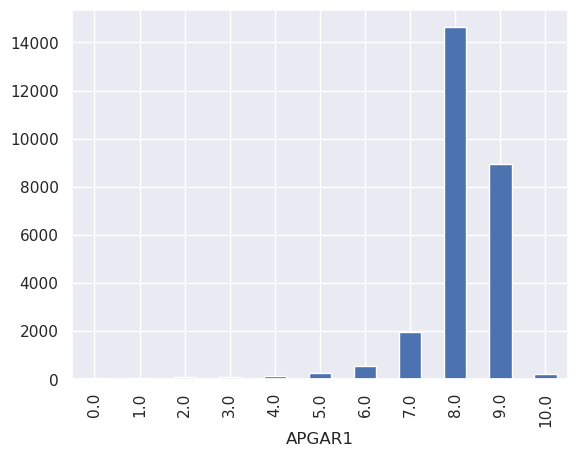

In [330]:
# Montando DataFrame para Grafico

sinasc_barras = sinasc_filtered_renamed[['PESO', 'SEXO', 'APGAR1', 'APGAR5', 'APGAR5_CLASS', 'GESTACAO', 'ESTC_IV_MAE', 'CONSULTAS', 'IDADE_MAE', 'LOC_NASC']]
# sinasc_barras = sinasc_new[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]
sinasc_barras['APGAR1'].value_counts().sort_index().plot.bar()

<Axes: xlabel='APGAR5'>

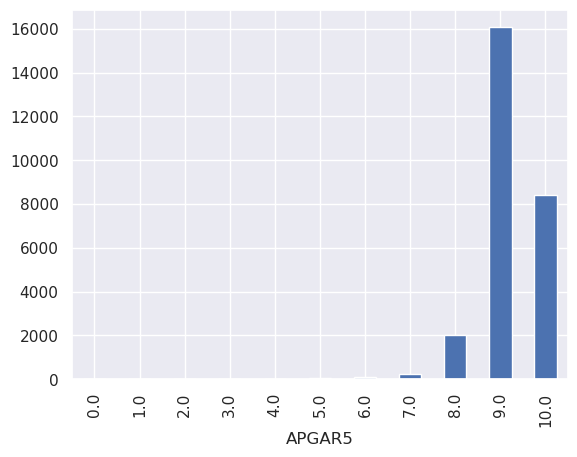

In [332]:
# 'APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE'
sinasc_barras['APGAR5'].value_counts().sort_index().plot.bar()

<Axes: xlabel='SEXO'>

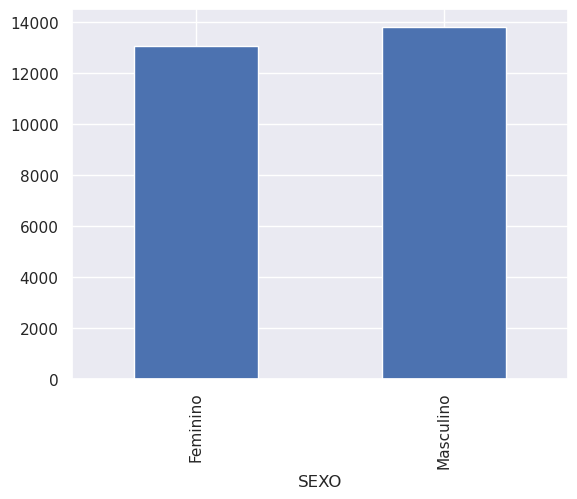

In [334]:
# 'APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE'
sinasc_barras['SEXO'].value_counts().sort_index().plot.bar()

<Axes: xlabel='GESTACAO'>

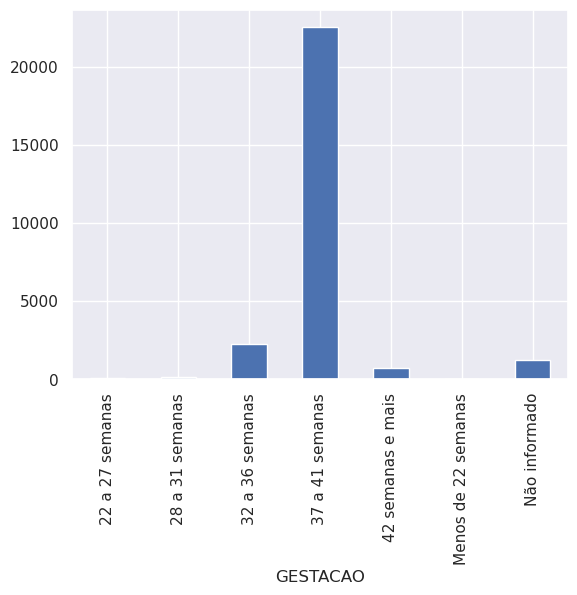

In [336]:

# 'APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE'
sinasc_barras['GESTACAO'].value_counts().sort_index().plot.bar()

<Axes: xlabel='ESTC_IV_MAE'>

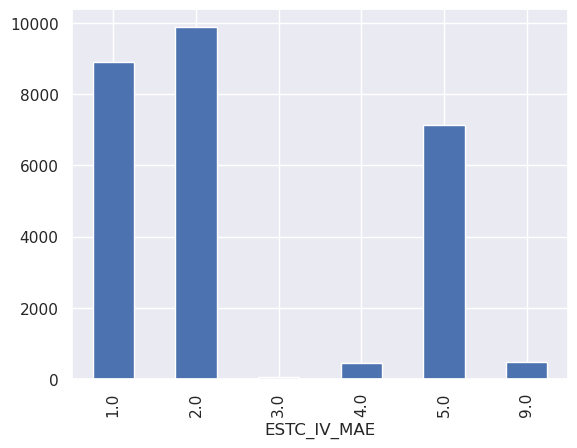

In [338]:
# 'APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE'
sinasc_barras['ESTC_IV_MAE'].value_counts().sort_index().plot.bar()

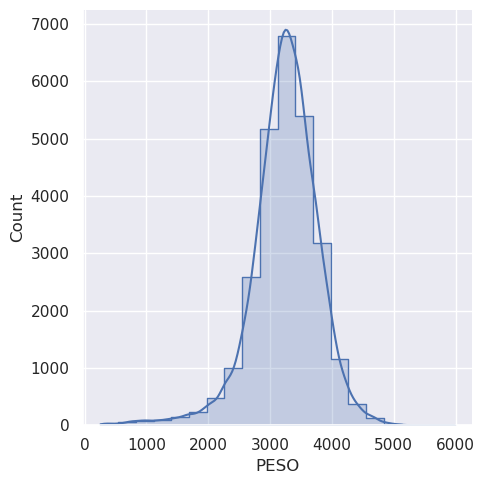

In [340]:
sns.displot(data = sinasc_barras[['PESO','APGAR5_CLASS']] 
            ,alpha = .25
            ,x = 'PESO'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

## 5.1 Quantidade de bebês ao longo do ano <a name="exemplo_5_1"></a>


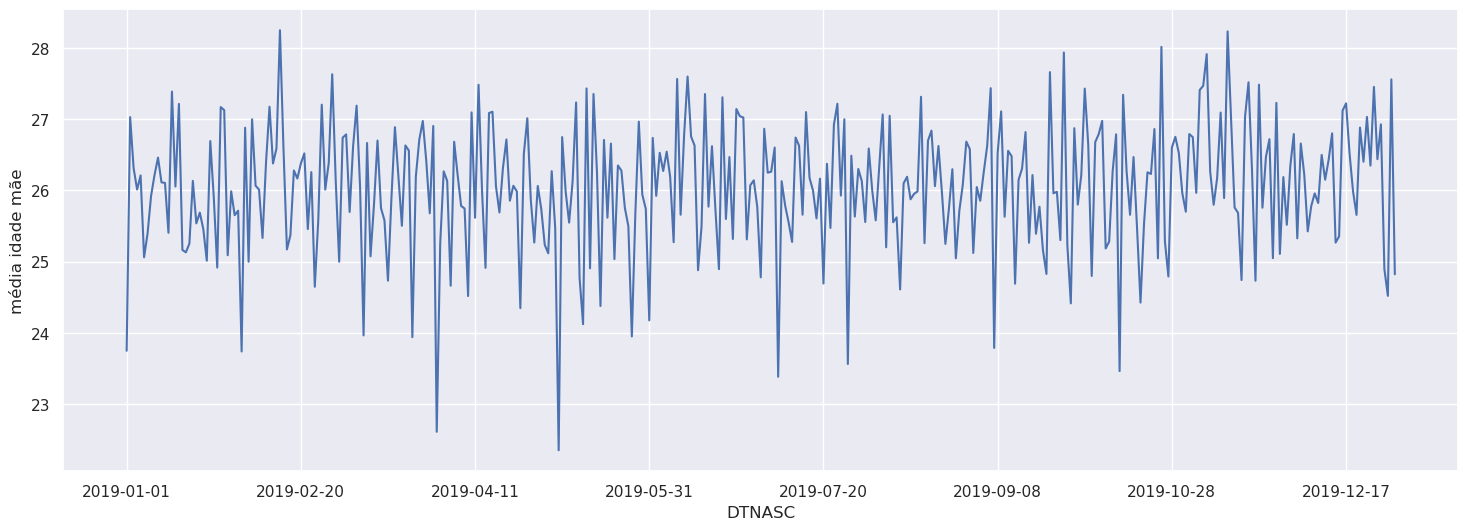

In [343]:
resultado = sinasc_filtered_renamed.groupby('DTNASC')['IDADE_MAE'].mean()
resultado.plot(figsize=[18, 6])
plt.ylabel('média idade mãe');

## 5.2 Quantidade de bebês fem e masc ao longo do ano <a name="exemplo_5_2"></a>

In [346]:
sinasc_filtered_renamed['SEXO'].value_counts()

SEXO
Masculino    13829
Feminino     13088
Name: count, dtype: int64

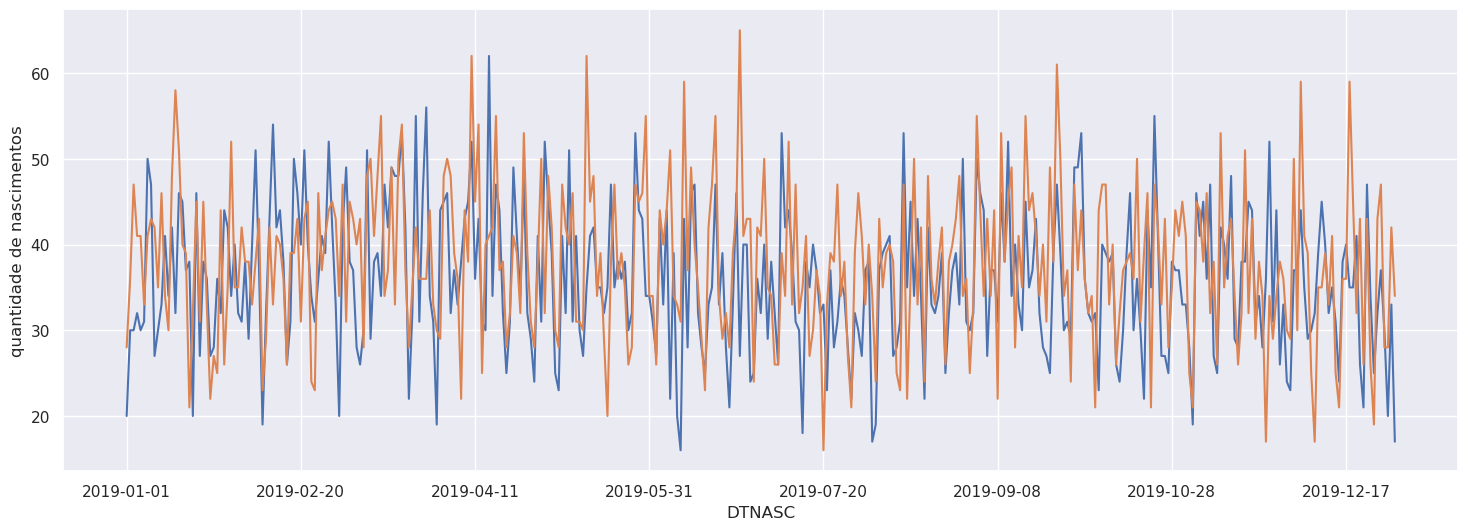

In [348]:
fem = sinasc_filtered_renamed[sinasc_filtered_renamed['SEXO'] == 'Feminino'].groupby('DTNASC')['IDADE_MAE'].count()
masc = sinasc_filtered_renamed[sinasc_filtered_renamed['SEXO'] == 'Masculino'].groupby('DTNASC')['IDADE_MAE'].count()

fem.plot(figsize=[18,6])
masc.plot()
plt.ylabel('quantidade de nascimentos');

## 5.3 Quantidade de bebês por dia da semana <a name="exemplo_5_3"></a>

In [351]:
# Mudando o índice para DTNASC

sinasc_filtered_renamed.loc[:,'DTNASC'] = pd.to_datetime(sinasc['DTNASC'])
sinasc_filtered_renamed.set_index('DTNASC', inplace=True)
#Monday=0, Sunday=6.
sinasc_filtered_renamed['DIADASEMANA'] = sinasc_filtered_renamed.index.dayofweek
sinasc_filtered_renamed.groupby('DIADASEMANA')['IDADE_MAE'].count()
result = sinasc_filtered_renamed.groupby('DIADASEMANA')['IDADE_MAE'].count()
result.index



/home/diego-furukawa/anaconda3/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Index([0, 1, 2, 3, 4, 5, 6], dtype='int32', name='DIADASEMANA')

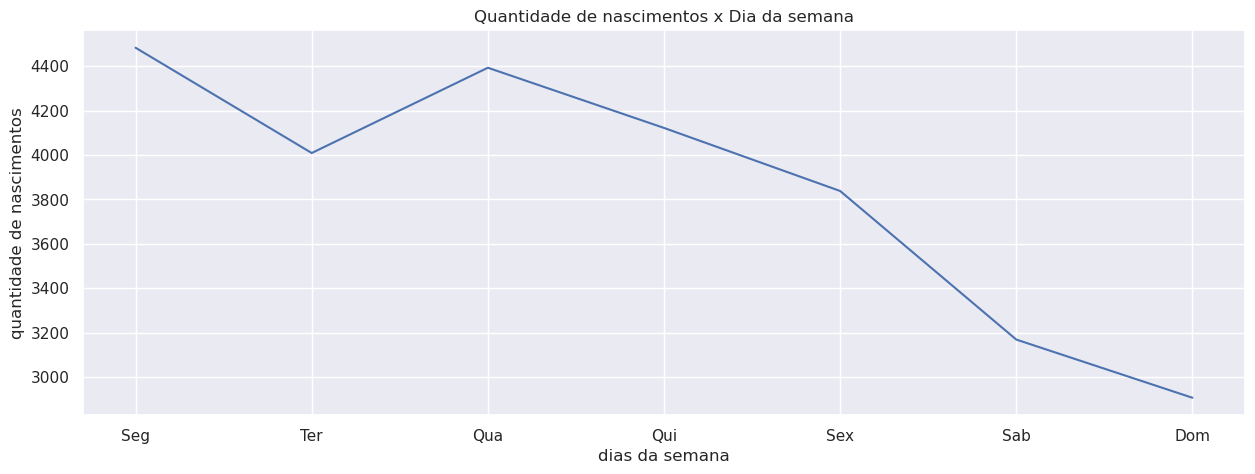

In [353]:

fig, ax = plt.subplots(figsize=[15,5])
result.plot()
ax.set_xticks(result.index)
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
plt.title('Quantidade de nascimentos x Dia da semana')
plt.xlabel('dias da semana')
plt.ylabel('quantidade de nascimentos');

## 5.4 Quantidade de bebês fem e masc por mês <a name="exemplo_5_4"></a>

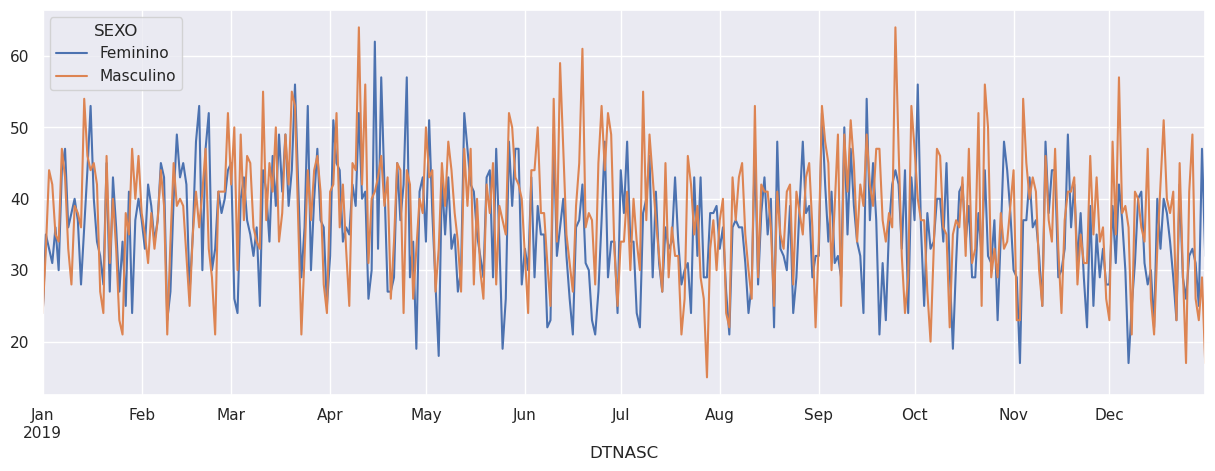

In [360]:
sinasc_filtered_renamed.groupby(['DTNASC', 'SEXO'])['IDADE_MAE'].count().unstack().plot(figsize=[15,5]);

## 5.5 Escolaridade mãe (ESCMAE) <a name="exemplo_5_5"></a>


<Axes: xlabel='ESCMAE'>

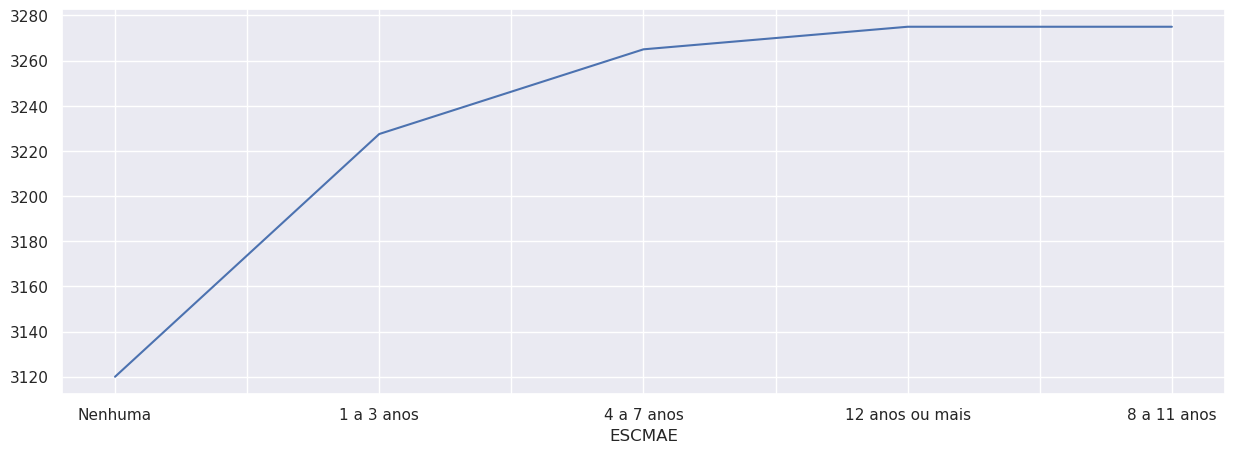

In [363]:
sinasc.groupby(['ESCMAE'])['PESO'].median().sort_values().plot(figsize=[15,5])

## 6. Etapa 6 Crisp-DM: Implantação <a name="exerc_06"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)